In [119]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import time

In [120]:
file_path = "Parameters_6_Fitted_FC_TmpDpn_RD_StrRt0.0001.csv"
data = pd.read_csv(file_path)
filtered_data = data[data['PEEQ'] <= 0.04]
PEEQ = filtered_data["PEEQ"].to_numpy()
PEEQ_fit = np.linspace(np.min(PEEQ), np.max(PEEQ), 200)

C:\Users\meian\AppData\Local\Temp\ipykernel_44364\2590856375.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


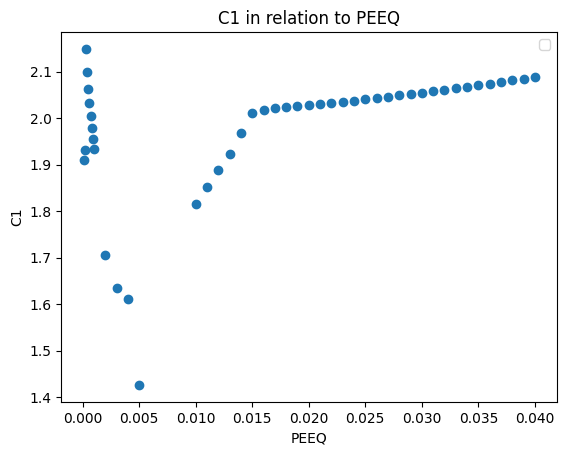

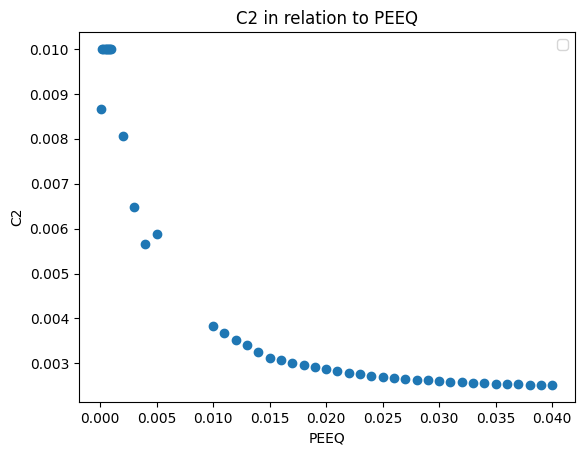

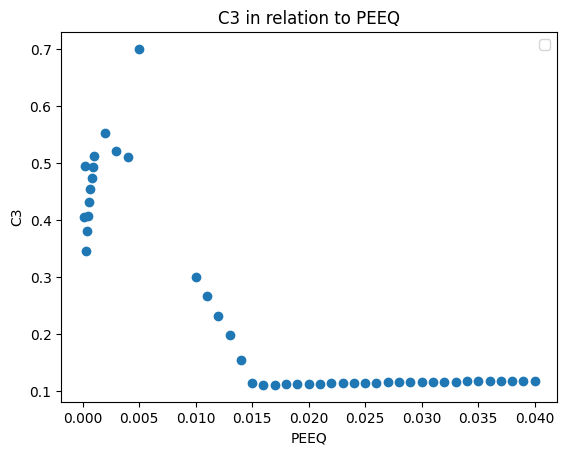

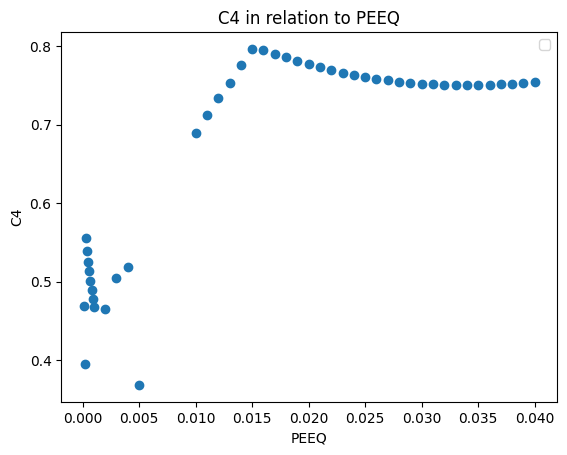

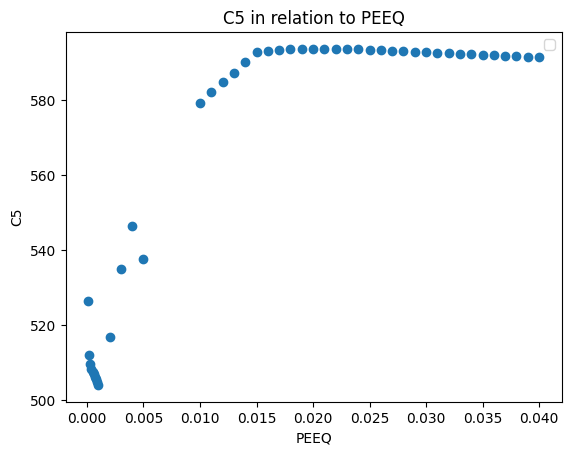

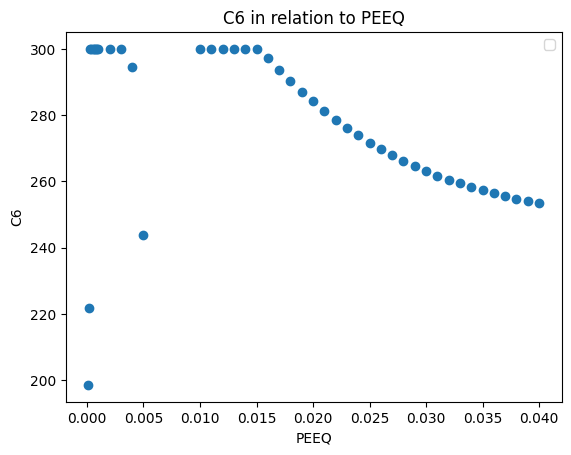

In [121]:
columns_to_plot = ['C1', 'C2', 'C3', 'C4', 'C5', 'C6']
for column in columns_to_plot:
    plt.figure()
    plt.plot(filtered_data['PEEQ'], filtered_data[column], 'o')
    plt.xlabel('PEEQ')
    plt.ylabel(column)
    plt.legend()
    plt.title(f'{column} in relation to PEEQ')
    plt.show()


C:\Users\meian\AppData\Local\Temp\ipykernel_44364\3737220232.py:2: RuntimeWarning: overflow encountered in exp
  return np.exp(-a * s) + b/(1 + np.exp(-c * (s - d))) + e * s + f


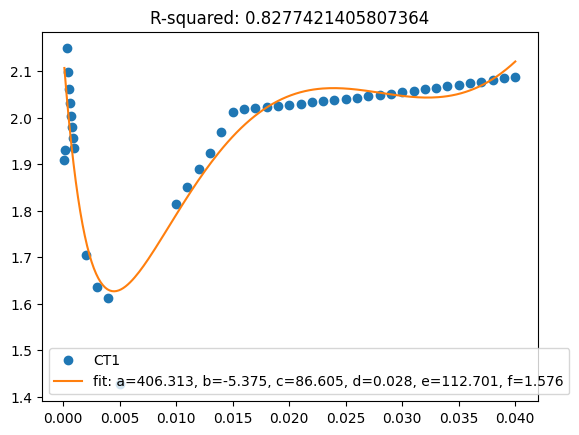

In [122]:
def cT1_func(s, a, b, c, d, e ,f):
    return np.exp(-a * s) + b/(1 + np.exp(-c * (s - d))) + e * s + f

df_para_fit = pd.DataFrame(PEEQ_fit, columns=["PEEQ_fit"])

cT1 = filtered_data["C1"].to_numpy()

params, _ = curve_fit(cT1_func, PEEQ, cT1, maxfev = 10000)
[a, b, c, d, e, f] = params
para_fit = cT1_func(PEEQ_fit, a, b, c, d, e, f)

plotObjects = plt.plot(PEEQ, cT1, 'o', PEEQ_fit, para_fit)

# Calculate R-squared
residuals = cT1 - cT1_func(PEEQ, a, b, c, d, e, f)
ss_res = np.sum(residuals**2)
ss_tot = np.sum((cT1 - np.mean(cT1))**2)
r_squared = 1 - (ss_res / ss_tot)

# Create the legend
plt.legend(iter(plotObjects), ('CT1', 'fit: a=%5.3f, b=%5.3f, c=%5.3f, d=%5.3f, e=%5.3f, f=%5.3f' % (a, b, c, d, e, f)))
plt.title(f'R-squared: {r_squared}')
plt.show()
df_para_fit['CT1'] = para_fit



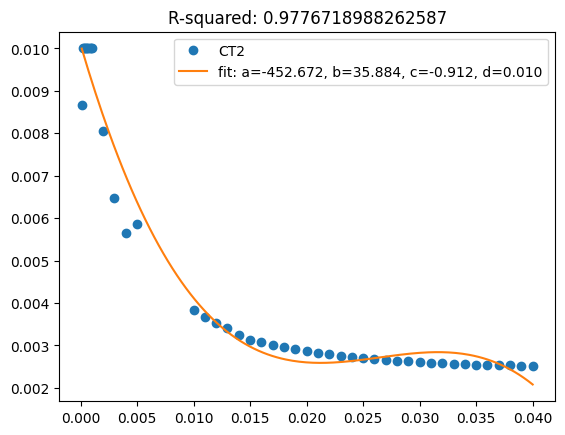

In [123]:
def cT2_func(s, a, b, c, d):
    return a * s**3 + b * s**2 + c * s + d

cT2 = filtered_data["C2"].to_numpy()

params = curve_fit(cT2_func, PEEQ, cT2, maxfev = 1000000)
[a, b, c, d] = params[0]
para_fit = cT2_func(PEEQ_fit, a, b, c, d)

plotObjects = plt.plot(PEEQ, cT2, 'o', PEEQ_fit, para_fit)

# Calculate R-squared
residuals = cT2 - cT2_func(PEEQ, a, b, c, d)
ss_res = np.sum(residuals**2)
ss_tot = np.sum((cT2 - np.mean(cT2))**2)
r_squared = 1 - (ss_res / ss_tot)

# Create the legend
plt.legend(iter(plotObjects), ('CT2', 'fit: a=%5.3f, b=%5.3f, c=%5.3f, d=%5.3f' % (a, b, c, d)))
plt.title(f'R-squared: {r_squared}')
plt.show()
df_para_fit['CT2'] = para_fit

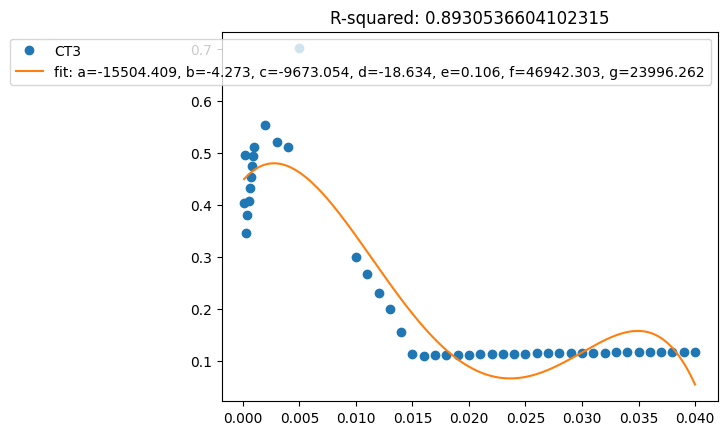

In [124]:
def cT3_func(s, a, b, c, d, e, f, g):
    return (a * np.exp(-b * s)) + (c / (1 + np.exp(-d * (s - e)))) + (f * s) + g

cT3 = filtered_data["C3"].to_numpy()

params = curve_fit(cT3_func, PEEQ, cT3, p0=[65, 0.001, 0.6, 250, 0.02, -18, 0.12], maxfev = 1000000)
[a, b, c, d, e, f, g] = params[0]
para_fit = cT3_func(PEEQ_fit, a, b, c, d, e, f, g)

plotObjects = plt.plot(PEEQ, cT3, 'o', PEEQ_fit, para_fit)

# Calculate R-squared
residuals = cT3 - cT3_func(PEEQ, a, b, c, d, e, f, g)
ss_res = np.sum(residuals**2)
ss_tot = np.sum((cT3 - np.mean(cT3))**2)
r_squared = 1 - (ss_res / ss_tot)

# Create the legend
plt.legend(iter(plotObjects), ('CT3', 'fit: a=%5.3f, b=%5.3f, c=%5.3f, d=%5.3f, e=%5.3f, f=%5.3f, g=%5.3f' % (a, b, c, d, e, f, g)))
plt.title(f'R-squared: {r_squared}')
plt.show()
df_para_fit['CT3'] = para_fit

C:\Users\meian\AppData\Local\Temp\ipykernel_44364\768812721.py:2: RuntimeWarning: overflow encountered in exp
  return (a * s**2 + b * s + c) + (d * np.exp(-e * (s - f)**2)) + (g * s)


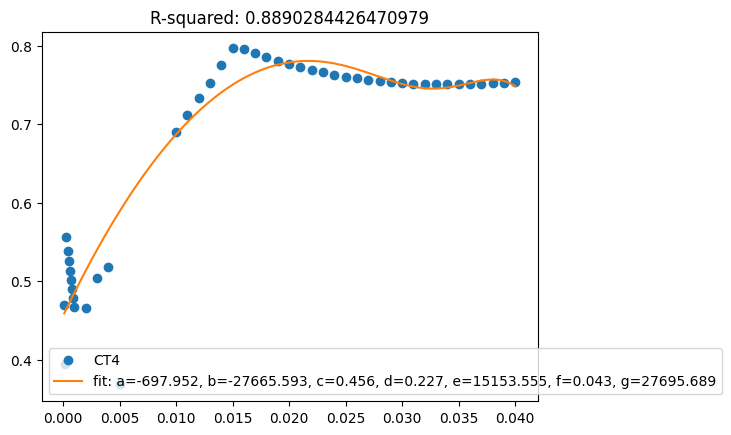

In [125]:
def cT4_func(s, a, b, c, d, e, f, g):
    return (a * s**2 + b * s + c) + (d * np.exp(-e * (s - f)**2)) + (g * s)

cT4 = filtered_data["C4"].to_numpy()

params = curve_fit(cT4_func, PEEQ, cT4, maxfev = 1000000)
[a, b, c, d, e, f, g] = params[0]
para_fit = cT4_func(PEEQ_fit, a, b, c, d, e, f, g)

plotObjects = plt.plot(PEEQ, cT4, 'o', PEEQ_fit, para_fit)

# Calculate R-squared
residuals = cT4 - cT4_func(PEEQ, a, b, c, d, e, f, g)
ss_res = np.sum(residuals**2)
ss_tot = np.sum((cT4 - np.mean(cT4))**2)
r_squared = 1 - (ss_res / ss_tot)

# Create the legend
plt.legend(iter(plotObjects), ('CT4', 'fit: a=%5.3f, b=%5.3f, c=%5.3f, d=%5.3f, e=%5.3f, f=%5.3f, g=%5.3f' % (a, b, c, d, e, f, g)))
plt.title(f'R-squared: {r_squared}')
plt.show()
df_para_fit['CT4'] = para_fit

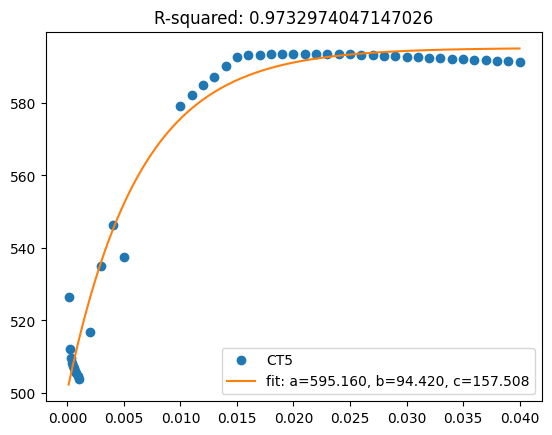

In [126]:
def cT5_func(s, a, b, c):
    return a - b * np.exp(-c * s)

cT5 = filtered_data["C5"].to_numpy()

params = curve_fit(cT5_func, PEEQ, cT5, maxfev = 1000000)
[a, b, c] = params[0]
para_fit = cT5_func(PEEQ_fit, a, b, c)

plotObjects = plt.plot(PEEQ, cT5, 'o', PEEQ_fit, para_fit)

# Calculate R-squared
residuals = cT5 - cT5_func(PEEQ, a, b, c)
ss_res = np.sum(residuals**2)
ss_tot = np.sum((cT5 - np.mean(cT5))**2)
r_squared = 1 - (ss_res / ss_tot)

# Create the legend
plt.legend(iter(plotObjects), ('CT5', 'fit: a=%5.3f, b=%5.3f, c=%5.3f' % (a, b, c)))
plt.title(f'R-squared: {r_squared}')
plt.show()
df_para_fit['CT5'] = para_fit

C:\Users\meian\AppData\Local\Temp\ipykernel_44364\2838031408.py:6: OptimizeWarning: Covariance of the parameters could not be estimated
  params = curve_fit(cT6_func, PEEQ, cT6, maxfev = 1000000)


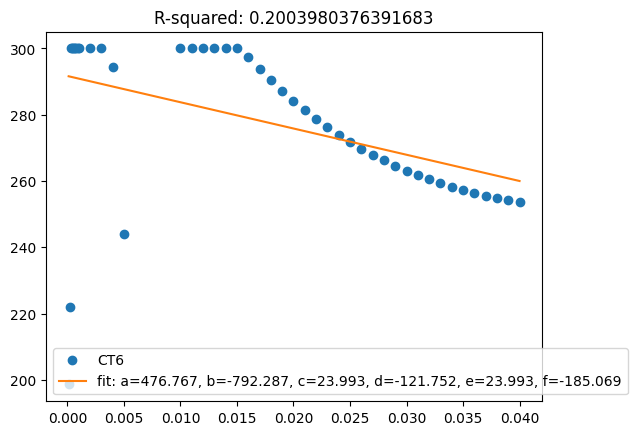

In [127]:
def cT6_func(s, a, b, c, d, e, f):
    return a + b * s + c * np.exp(-d * (s - e)) + f

cT6 = filtered_data["C6"].to_numpy()

params = curve_fit(cT6_func, PEEQ, cT6, maxfev = 1000000)
[a, b, c, d, e, f] = params[0]
para_fit = cT6_func(PEEQ_fit, a, b, c, d, e, f)

plotObjects = plt.plot(PEEQ, cT6, 'o', PEEQ_fit, para_fit)

# Calculate R-squared
residuals = cT6 - cT6_func(PEEQ, a, b, c, d, e, f)
ss_res = np.sum(residuals**2)
ss_tot = np.sum((cT6 - np.mean(cT6))**2)
r_squared = 1 - (ss_res / ss_tot)

# Create the legend
plt.legend(iter(plotObjects), ('CT6', 'fit: a=%5.3f, b=%5.3f, c=%5.3f, d=%5.3f, e=%5.3f, f=%5.3f' % (a, b, c, d, e, f)))
plt.title(f'R-squared: {r_squared}')
plt.show()
df_para_fit['CT6'] = para_fit

In [128]:
df_para_fit.to_csv('para_fit_results_new.csv', index=False)